In [90]:
#code for plots and main analyses in: Ma, Westhoff, van Duijvenvoorde (submitted to Elife)

#load packages and data files
library(lme4)
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=8)
library(sjPlot)
library(RColorBrewer)

sampledata <- read.csv('sampledata.csv')
sampledata$f_ageGroup <- as.factor(sampledata$ageGroup) # groups for data visualization
sampledata$open <- 25 - sampledata$closed
sampleHist <- sampledata[!sampledata$rawChoice == 0,]
df_models <- read.csv('df_modelresults.csv')
BICdiff <- read.csv("BIC_models_Forrestplot_ORA.csv", header = TRUE)
SumBIC <- read.csv("Summed_BIC_ORA.csv", header = TRUE)

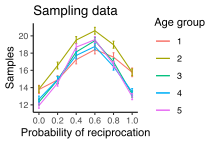

In [128]:
# Figure1b. Sample data
options(repr.plot.width=3, repr.plot.height=2)
p_1B <- ggplot(sampleHist, aes(x = recip, y = open, color = f_ageGroup)) + 
  stat_summary(fun.y=mean,
               geom="line") +
  stat_summary(fun.data=mean_se,
               geom="errorbar",
               width = 0.02) + 
  labs(title = "Sampling data", x = "Probability of reciprocation", y = "Samples", color = "Age group") +
  theme_classic() +
  scale_x_continuous(breaks=seq(0,1,0.2)) 
p_1B

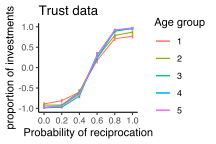

In [132]:
# Figure1c. Invest data
p <- ggplot(sampleHist, aes(x = recip, y = rawChoice, color = f_ageGroup)) + 
  stat_summary(fun.y=mean, geom="line") +
  stat_summary(fun.data=mean_se, geom="errorbar", width = 0.02) + 
  scale_fill_brewer(palette = "Paired") +
  labs(title = "Trust data", x = "Probability of reciprocation", y = "proportion of investments", color = "Age group") +
  theme_classic() +
  scale_x_continuous(breaks=seq(0,1,0.2))
p

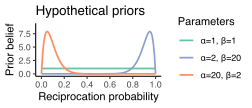

In [126]:
#Figure2a: Hypothetical prior distributions 
options(repr.plot.width=3.5, repr.plot.height=1.5)
options(warn=-1)
options(jupyter.plot_mimetypes = "image/svg+xml") 

x <- seq(0, 1, .01)
q <- dbeta(x, 1, 1)
z <- dbeta(x, 2, 20)
w <- dbeta(x, 20, 2)
df <- data.frame(x, q, z, w)

df <- gather(df, func, val, -x)
gg <- ggplot(df, aes(x=x, y=val, group=func))
gg <- gg + geom_line(aes(color=func), size =0.8)
gg <- gg + scale_color_manual(name="Parameters", 
                              values=c("#66c2a5", "#8da0cb", "#fc8d62"),
                              labels=c("α=1, β=1", "α=2, β=20", "α=20, β=2"))
gg <- gg + labs(x="Reciprocation probability", y="Prior belief",
                title="Hypothetical priors") +
ylim(0,9) +
scale_x_continuous(breaks=seq(0,1,0.2)) 

gg <- gg + theme_classic() 
gg 

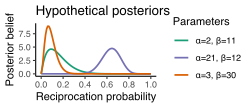

In [15]:
#Figure2b: Corresponding posterior distributions to illustrate the effect of prior distributions on belief updates
options(repr.plot.width=3.5, repr.plot.height=1.5)
options(warn=-1)
options(jupyter.plot_mimetypes = "image/svg+xml") 

# green+1, red+10
x <- seq(0, 1, .01)
q <- dbeta(x, 2, 11)
z <- dbeta(x, 3, 30)
w <- dbeta(x, 21, 12)
df <- data.frame(x, q, z, w)

df <- gather(df, func, val, -x)
gg <- ggplot(df, aes(x=x, y=val, group=func))
gg <- gg + geom_line(aes(color=func), size =0.8)
gg <- gg + scale_color_manual(name="Parameters", 
                              values=c("#1b9e77", "#7570b3", "#d95f02"),
                              labels=c("α=2, β=11", "α=21, β=12", "α=3, β=30"))
gg <- gg + labs(x="Reciprocation probability", y="Posterior belief",
                title="Hypothetical posteriors") +
ylim(0,9) +
scale_x_continuous(breaks=seq(0,1,0.2)) 

gg <- gg + theme_classic()

gg

In [127]:
#center and scale data for sampling regressions
sampledata$diffgreen <- abs(sampledata$green - sampledata$red)
sampledata$s_diffgreen <- scale(sampledata$diffgreen, center = TRUE, scale = TRUE)
sampledata$s_age <- scale(sampledata$age, center = TRUE, scale = TRUE)
sampledata$choice = sampledata$rawChoice
sampledata$choice[sampledata$choice==-1] <- 1

#Descriptive statistics: the consistency of sample outcomes affected the probability of sampling
lin_diffgreenmodel <- glmer(choice ~ s_diffgreen * s_age + (1| subject), data = sampledata, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
quad_diffgreenmodel <- glmer(choice ~ s_diffgreen * poly(s_age, degree = 2, raw = TRUE) + (1| subject), data = sampledata, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
tab_model(quad_diffgreenmodel, show.stat = TRUE) #opens in new tab
summary(quad_diffgreenmodel) 
anova(lin_diffgreenmodel, quad_diffgreenmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choice ~ s_diffgreen * poly(s_age, degree = 2, raw = TRUE) +  
    (1 | subject)
   Data: sampledata
Control: glmerControl(optCtrl = list(maxfun = 1e+09), optimizer = c("bobyqa"))

     AIC      BIC   logLik deviance df.resid 
 65387.0  65457.0 -32686.5  65373.0   162138 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2759 -0.2670 -0.1910 -0.1443 14.4700 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.5888   0.7673  
Number of obs: 162145, groups:  subject, 157

Fixed effects:
                                                 Estimate Std. Error z value
(Intercept)                                      -2.92960    0.09447 -31.010
s_diffgreen                                       0.83016    0.01588  52.293
poly(s_age, degree = 2, raw = TRUE)1              0.04548    0.06220   0.731
poly(s_age, degree = 2, raw =

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
lin_diffgreenmodel,5,65392.41,65442.39,-32691.21,65382.41,NA,NA,NA
quad_diffgreenmodel,7,65387.01,65456.99,-32686.51,65373.01,9.399773,2,0.00909631


In [68]:
# center and scale for invest regression
sampleHist$rawChoice[sampleHist$rawChoice<0] <- 0
sampleHist$s_ageExact <- scale(sampleHist$ageExact, center = TRUE, scale = TRUE)

# Descriptive statistics: invest decisions were predicted by the reciprocation probability
modelinv <- glmer(rawChoice ~ recip * poly(s_ageExact, degree = 2, raw = TRUE) + (1| subject), data = sampleHist, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
tab_model(modelinv, show.stat = TRUE) #opens in new tab
summary(modelinv) 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rawChoice ~ recip * poly(s_ageExact, degree = 2, raw = TRUE) +  
    (1 | subject)
   Data: sampleHist
Control: glmerControl(optCtrl = list(maxfun = 1e+09), optimizer = c("bobyqa"))

     AIC      BIC   logLik deviance df.resid 
  5560.0   5610.1  -2773.0   5546.0     9413 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-25.169  -0.245  -0.040   0.237  50.693 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.7032   0.8386  
Number of obs: 9420, groups:  subject, 157

Fixed effects:
                                                Estimate Std. Error z value
(Intercept)                                      -5.9597     0.2080 -28.651
recip                                            10.8672     0.3142  34.582
poly(s_ageExact, degree = 2, raw = TRUE)1        -1.0604     0.1323  -8.017
poly(s_ageExact, degree = 2, raw 

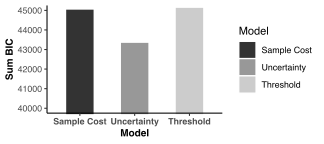

In [104]:
#Figure 3A. Model comparisons 
options(repr.plot.width=4.5, repr.plot.height=2)
SumBIC$Model <- factor(SumBIC$Model,levels = c("Sample Cost", "Uncertainty", "Threshold"))
model_barplots <-ggplot(SumBIC, aes(x=Model, y=Summed.BIC, , width = 0.5, fill = Model)) +
  geom_bar(stat="identity") +
  scale_fill_grey() +
  ylab('Sum BIC') +
  coord_cartesian(ylim=c(40000,45000)) +
  theme(plot.title=element_text(size=10,face="bold"),
        axis.text.x=element_text(face="bold"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.title=element_text(size=10,face="bold"))
model_barplots


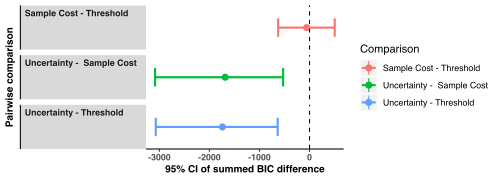

In [106]:
# Figure 3B. model comparisons
options(repr.plot.width=7, repr.plot.height=2.5)
modeldiff_plot = ggplot(data=BICdiff,
                  aes(x = Comparison, y = Summed.difference, ymin = Lowerbound, ymax = Upperbound ))+
  geom_pointrange(aes(col=Comparison))+
  geom_hline(aes(fill=Comparison),yintercept =1, linetype=2)+
  xlab('Pairwise comparison')+ ylab("95% CI of summed BIC difference")+
  geom_errorbar(aes(ymin=Lowerbound, ymax=Upperbound,col=Comparison),width=0.5,cex=1)+ 
  facet_wrap(~Comparison,strip.position="left",nrow=3,scales = "free_y") +
  theme(plot.title=element_text(size=10,face="bold"),
              axis.text.y=element_blank(),
              axis.ticks.y=element_blank(),
              axis.text.x=element_text(face="bold"),
              panel.background = element_blank(),
              axis.line = element_line(colour = "black"),
              axis.title=element_text(size=10,face="bold"),
              strip.text.y = element_text(hjust=0,vjust = 1,angle=180,face="bold"))+
  coord_flip()
modeldiff_plot

In [93]:
# Regression uncertainty model prior mean estimates with age
lin_priormean_model <- lm(logmeanprior ~ s_ageExact, data = df_models)
quad_priormean_model <- lm(logmeanprior ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
summary(lin_priormean_model) 
summary(quad_priormean_model)
anova(lin_priormean_model, quad_priormean_model)
tab_model(lin_priormean_model) # opens in new tab


Call:
lm(formula = logmeanprior ~ s_ageExact, data = df_models)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2529  -0.1303   0.0885   0.3387   1.2838 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.93726    0.08038  -11.66  < 2e-16 ***
s_ageExact   0.21045    0.08063    2.61  0.00994 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.007 on 155 degrees of freedom
Multiple R-squared:  0.0421,	Adjusted R-squared:  0.03592 
F-statistic: 6.812 on 1 and 155 DF,  p-value: 0.009943



Call:
lm(formula = logmeanprior ~ poly(s_ageExact, degree = 2, raw = TRUE), 
    data = df_models)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0519  -0.1217   0.0415   0.2514   1.5954 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                               -0.75860    0.12088  -6.276 3.36e-09
poly(s_ageExact, degree = 2, raw = TRUE)1  0.21204    0.07990   2.654   0.0088
poly(s_ageExact, degree = 2, raw = TRUE)2 -0.17980    0.09151  -1.965   0.0512
                                             
(Intercept)                               ***
poly(s_ageExact, degree = 2, raw = TRUE)1 ** 
poly(s_ageExact, degree = 2, raw = TRUE)2 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9979 on 154 degrees of freedom
Multiple R-squared:  0.06552,	Adjusted R-squared:  0.05339 
F-statistic: 5.399 on 2 and 154 DF,  p-value: 0.005416


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,157.2136,NA,NA,NA,NA
154,153.3686,1,3.844922,3.86075,0.05122764


In [107]:
# Regression uncertainty model prior uncertainty estimates with age
lin_priorSD_model <- lm(logpriorSD ~ s_ageExact, data = df_models)
quad_priorSD_model <- lm(logpriorSD ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
summary(lin_priorSD_model) 
anova(lin_priorSD_model, quad_priorSD_model)
tab_model(quad_priorSD_model)


Call:
lm(formula = logpriorSD ~ s_ageExact, data = df_models)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3209  -0.0001   0.4259   0.8185   1.5983 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2430     0.1467 -15.285  < 2e-16 ***
s_ageExact    0.4910     0.1472   3.335  0.00107 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.839 on 155 degrees of freedom
Multiple R-squared:  0.06695,	Adjusted R-squared:  0.06093 
F-statistic: 11.12 on 1 and 155 DF,  p-value: 0.001067


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,524.0169,NA,NA,NA,NA
154,501.7480,1,22.26897,6.834947,0.009826869


In [110]:
# Regression uncertainty model uncertainty tolerance criterion estimates with age
lin_criterion_model <- lm(logcriterion ~ s_ageExact, data = df_models)
quad_criterion_model <- lm(logcriterion ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
summary(lin_criterion_model) 
summary(quad_criterion_model)
anova(lin_criterion_model, quad_criterion_model)
tab_model(lin_criterion_model)


Call:
lm(formula = logcriterion ~ s_ageExact, data = df_models)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.5379  -0.3794   1.2570   2.7783   5.4154 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.0401     0.4101 -12.291  < 2e-16 ***
s_ageExact    1.7961     0.4114   4.366  2.3e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.138 on 155 degrees of freedom
Multiple R-squared:  0.1095,	Adjusted R-squared:  0.1038 
F-statistic: 19.06 on 1 and 155 DF,  p-value: 2.302e-05



Call:
lm(formula = logcriterion ~ poly(s_ageExact, degree = 2, raw = TRUE), 
    data = df_models)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.2009   0.2466   0.9482   2.3408   6.4763 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                                -4.3907     0.6205  -7.077 4.89e-11
poly(s_ageExact, degree = 2, raw = TRUE)1   1.8018     0.4102   4.393 2.07e-05
poly(s_ageExact, degree = 2, raw = TRUE)2  -0.6536     0.4697  -1.391    0.166
                                             
(Intercept)                               ***
poly(s_ageExact, degree = 2, raw = TRUE)1 ***
poly(s_ageExact, degree = 2, raw = TRUE)2    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.123 on 154 degrees of freedom
Multiple R-squared:  0.1206,	Adjusted R-squared:  0.1092 
F-statistic: 10.56 on 2 and 154 DF,  p-value: 5.051e-05


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,4091.782,NA,NA,NA,NA
154,4040.982,1,50.79923,1.935936,0.1661172


In [111]:
# Regression uncertainty model prior uncertainty estimates with age
logsoftmax <- log(df_models$softmax)
lin_softmax_model <- lm(logsoftmax ~ s_ageExact, data = df_models)
quad_softmax_model <- lm(logsoftmax ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
summary(lin_softmax_model) 
summary(quad_softmax_model)
anova(lin_softmax_model, quad_softmax_model)
tab_model(lin_softmax_model)


Call:
lm(formula = logsoftmax ~ s_ageExact, data = df_models)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4183 -1.3502 -0.8032 -0.1478 11.1948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.1959     0.2134  24.343   <2e-16 ***
s_ageExact   -0.1126     0.2141  -0.526      0.6    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.674 on 155 degrees of freedom
Multiple R-squared:  0.001781,	Adjusted R-squared:  -0.004659 
F-statistic: 0.2766 on 1 and 155 DF,  p-value: 0.5997



Call:
lm(formula = logsoftmax ~ poly(s_ageExact, degree = 2, raw = TRUE), 
    data = df_models)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8185 -1.2977 -0.7736  0.0052 10.7265 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 4.8159     0.3224  14.936   <2e-16
poly(s_ageExact, degree = 2, raw = TRUE)1  -0.1160     0.2131  -0.544    0.587
poly(s_ageExact, degree = 2, raw = TRUE)2   0.3824     0.2441   1.567    0.119
                                             
(Intercept)                               ***
poly(s_ageExact, degree = 2, raw = TRUE)1    
poly(s_ageExact, degree = 2, raw = TRUE)2    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.662 on 154 degrees of freedom
Multiple R-squared:  0.01744,	Adjusted R-squared:  0.004683 
F-statistic: 1.367 on 2 and 154 DF,  p-value: 0.2579


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,1108.642,NA,NA,NA,NA
154,1091.246,1,17.39511,2.454851,0.1192148


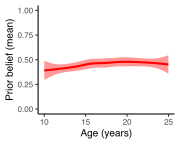

In [120]:
#Figure 4a: Pior mean as function of age
options(repr.plot.width=2.5, repr.plot.height=2)
priormean_age <- ggplot(df_models, aes(x= ageExact, y= meanprior)) +
  geom_smooth(method=loess, se=TRUE, color="red", fill="red") +
  xlab("Age (years)") +
  ylab("Prior belief (mean)") +
  ylim(0,1) +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))
priormean_age

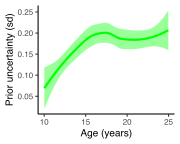

In [122]:
#Figure 4b: Pior uncertainty as function of age
priorUnc_age <- ggplot(df_models, aes(x=ageExact, y= priorSD)) + 
  geom_smooth(method=loess, se=TRUE, color="green", fill=" green") +
  xlab("Age (years)") +
  ylab('Prior uncertainty (sd)') +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))
priorUnc_age

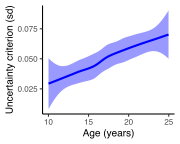

In [124]:
#Figure 4c: uncertainty tolerance criterion as function of age
criterion_age <- ggplot(df_models, aes(x=ageExact, y= criterion)) +
  geom_smooth(method=loess, se=TRUE, color="blue", fill="blue") +
  xlab("Age (years)") +
  ylab("Uncertainty criterion (sd)") +  
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))
criterion_age